In [2]:
import numpy as np
import matplotlib.pylab as pl
from matplotlib.lines import Line2D
import torch
import ot.plot
from IPython import display
import time

In [3]:
import sys
sys.path.append('../code/')
from generate_data import make_data
from linear_solver import UOT_W
from sinkhorn_iterates import sinkhorn

In [5]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

device='cpu'
dtype = torch.DoubleTensor
print('Used device: '+device)

Used device: cpu


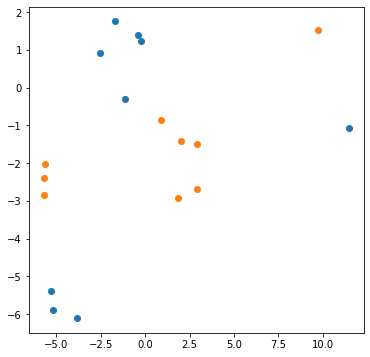

In [6]:
np.random.seed(1)
X=np.vstack((np.random.randn(5,2)+np.array([-2,2]),np.random.randn(1,2)+np.array([10,1]),np.random.randn(3,2)+np.array([-5,-5])))
Y=np.vstack((np.random.randn(5,2)+np.array([2,-2]),np.random.randn(1,2)+np.array([10,1]),np.random.randn(3,2)+np.array([-5,-2])))
#X,Y=make_data("iso_gaussians",8,2)

n,d=X.shape

pl.figure(figsize=(6,6))
pl.scatter(X[:, 0], X[:, 1], c='C0', label='Source')
pl.scatter(Y[:, 0], Y[:, 1], c='C1', label='Target')

In [7]:
C=ot.dist(X,Y)
Cx=ot.dist(X,X)
Cy=ot.dist(Y,Y)
a,b=torch.ones((n,)),torch.ones((n,))

In [8]:
P,Qx,Qy=UOT_W(a,b,C,lam=1,Cx=Cx,Cy=Cy,innerplan=True,solver="ECOS")

a_W=P@np.ones(n)
b_W=(P.T)@np.ones(n)

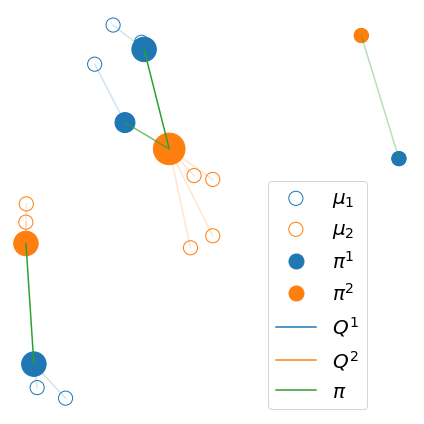

In [9]:
s=200
pl.figure(figsize=(6,6))
ot.plot.plot2D_samples_mat(X, Y, P, c='C2')
ot.plot.plot2D_samples_mat(X, X, Qx, c='C0',alpha=0.2)
ot.plot.plot2D_samples_mat(Y, Y, Qy, c='C1',alpha=0.2)
pl.scatter(X[:, 0], X[:, 1], c='C0',s=a_W*s)
pl.scatter(Y[:, 0], Y[:, 1], c='C1',s=b_W*s)
#pl.scatter(X[:, 0], X[:, 1], c='C0',alpha=0.2)
#pl.scatter(Y[:, 0], Y[:, 1], c='C1',alpha=0.2)
pl.scatter(X[:, 0], X[:, 1], facecolors='none', edgecolors='C0',label="$\mu_1$",s=s)
pl.scatter(Y[:, 0], Y[:, 1], facecolors='none', edgecolors='C1',label="$\mu_2$",s=s)
label1 = Line2D([0], [0], label="$\pi^1$", marker='o', color='C0', linestyle='',markersize=15)
label2 = Line2D([0], [0], label="$\pi^2$", marker='o', color='C1', linestyle='',markersize=15)
label3 = Line2D([0], [0], label="$Q^1$", color='C0', linestyle='solid',alpha=1)
label4 = Line2D([0], [0], label="$Q^2$", color='C1', linestyle='solid',alpha=1)
label5 = Line2D([0], [0], label="$\pi$", color='C2', linestyle='solid')
#label6 = Line2D([0], [0], label="$\mu_1$", marker='o', color='C0', linestyle='',alpha=0.2)
#label7 = Line2D([0], [0], label="$\mu_2$", marker='o', color='C1', linestyle='',alpha=0.2)
handles, labels = pl.gca().get_legend_handles_labels()
handles.extend([label1,label2,label3,label4,label5])#,label6,label7])
pl.axis('off')
pl.tight_layout()
pl.legend(handles=handles,bbox_to_anchor=(.9,.6), prop={'size': 20})
#pl.savefig("result/Demo/cluster_W.pdf",bbox_inches='tight')

In [17]:
u,v,G,Qx,Qy=sinkhorn(a.float(),b.float(),torch.tensor(C).float(),lam=1e0,eps=1,numiter=500,pen="sinkhorn",
               Cx=torch.tensor(Cx).float(),Cy=torch.tensor(Cy).float(),numiter2=10,innerplan=True)
P=u.reshape((-1, 1)) * G * v.reshape((1, -1))
a_W=P@np.ones(n)
b_W=(P.T)@np.ones(n)

print(torch.sum(P))
print(torch.sum(P*C))

tensor(9.)
tensor(69.2632, dtype=torch.float64)


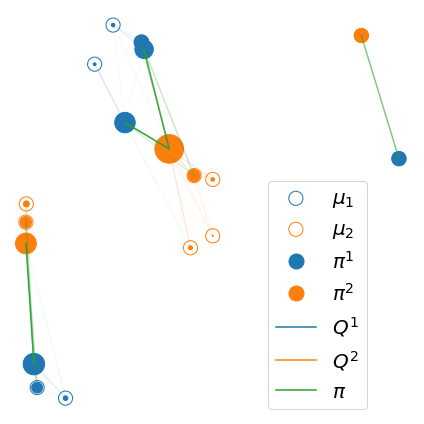

In [19]:
s=200
pl.figure(figsize=(6,6))
ot.plot.plot2D_samples_mat(X, Y, P.numpy(), c='C2')
ot.plot.plot2D_samples_mat(X, X, Qx.numpy(), c='C0',alpha=0.2)
ot.plot.plot2D_samples_mat(Y, Y, Qy.numpy(), c='C1',alpha=0.2)
pl.scatter(X[:, 0], X[:, 1], c='C0',s=a_W*s)
pl.scatter(Y[:, 0], Y[:, 1], c='C1',s=b_W*s)
#pl.scatter(X[:, 0], X[:, 1], c='C0',alpha=0.2)
#pl.scatter(Y[:, 0], Y[:, 1], c='C1',alpha=0.2)
pl.scatter(X[:, 0], X[:, 1], facecolors='none', edgecolors='C0',label="$\mu_1$",s=s)
pl.scatter(Y[:, 0], Y[:, 1], facecolors='none', edgecolors='C1',label="$\mu_2$",s=s)
label1 = Line2D([0], [0], label="$\pi^1$", marker='o', color='C0', linestyle='',markersize=15)
label2 = Line2D([0], [0], label="$\pi^2$", marker='o', color='C1', linestyle='',markersize=15)
label3 = Line2D([0], [0], label="$Q^1$", color='C0', linestyle='solid',alpha=1)
label4 = Line2D([0], [0], label="$Q^2$", color='C1', linestyle='solid',alpha=1)
label5 = Line2D([0], [0], label="$\pi$", color='C2', linestyle='solid')
#label6 = Line2D([0], [0], label="$\mu_1$", marker='o', color='C0', linestyle='',alpha=0.2)
#label7 = Line2D([0], [0], label="$\mu_2$", marker='o', color='C1', linestyle='',alpha=0.2)
handles, labels = pl.gca().get_legend_handles_labels()
handles.extend([label1,label2,label3,label4,label5])#,label6,label7])
pl.axis('off')
pl.tight_layout()
pl.legend(handles=handles,bbox_to_anchor=(.9,.6), prop={'size': 20})
pl.savefig("result/Demo/cluster_S.pdf",bbox_inches='tight')

tensor([[3.4495e-01, 4.1465e-02, 6.2164e-03, 3.2330e-01, 3.8444e-01, 0.0000e+00,
         1.3099e-30, 1.0305e-28, 6.6004e-33],
        [1.8400e-05, 3.5808e-02, 4.1352e-05, 1.1785e-05, 4.0476e-03, 0.0000e+00,
         6.3980e-23, 1.8454e-23, 2.6655e-25],
        [5.6819e-02, 8.5175e-01, 9.7885e-01, 7.3500e-02, 1.3494e-01, 0.0000e+00,
         3.4260e-18, 3.3216e-16, 7.2949e-20],
        [5.9729e-01, 4.9064e-02, 1.4857e-02, 6.0262e-01, 4.3615e-01, 0.0000e+00,
         5.2141e-30, 7.2162e-28, 3.1573e-32],
        [9.2365e-04, 2.1915e-02, 3.5471e-05, 5.6720e-04, 4.0418e-02, 0.0000e+00,
         1.0515e-29, 1.0999e-29, 2.5042e-32],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.8626e-32, 2.0502e-21, 5.3299e-21, 4.0132e-32, 6.2235e-29, 0.0000e+00,
         8.7369e-01, 6.1828e-01, 8.0160e-01],
        [1.7791e-33, 7.1791e-25, 6.2737e-22, 6.7430e-33, 7.9032e-32, 0.0000e+00,
         7.5064e-04, 1.0284e-0